<a href="https://colab.research.google.com/github/JMawyin/SidewalkLab/blob/main/SidewalkLab_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

○ Dataset - http://data.un.org/Explorer.aspx and the ‘Energy Statistics Database’. 

**Questions:**

* i. For 2018, what was the percentage of the World’s electricity generation by the following sources - Coal, Oil, Natural Gas, Biofuels, Hydro, Nuclear, solar, and wind?
* ii. For the decade spanning 2008-2018, what was the worldwide energy consumption by the following sectors - households, industry, transport, agriculture, and commercial / public services?
* iii. Lastly, we would like you to list up to two (2) questions you consider would be interesting to ask of the same dataset available.

In [ ]:
import pandas as pd
import altair as alt

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /gdrive
Mounted at /content/drive


## Loading List of Datasets from Google Drive

In [ ]:
from glob import glob
UNdata_path = '/content/drive/MyDrive/Datasets/Sidewalk_Lab/'
UN_files = glob(UNdata_path + '*.csv')
UN_files.sort()
UN_files

['/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_BioFuelsOthers.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_BioKerosene.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_Biodiesel.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_Biogases.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_Biogasoline.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_BrownCoal.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_CoalBituminousOther.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_CoalBrownBriquette.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_CoalCoking.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_CoalHard.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_CoalTar.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_ElectricityHydro.csv',
 '/content/drive/MyDrive/Datasets/Sidewalk_L

## Q1: For 2018, what was the percentage of the World’s electricity generation by the following sources - Coal, Oil, Natural Gas, Biofuels, Hydro, Nuclear, solar, and wind?

Here is the subset of all *.csv files from the ‘Energy Statistics Database’ that are electricity generation related.

In [ ]:

keywords = ["electricity","Electricity"]
elec_gen_pths = [s for s in UN_files if any(xs in s for xs in keywords)]
print("\n".join(elec_gen_pths)) #printing every list item with a newline

/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_ElectricityHydro.csv
/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_ElectricityNuclear.csv
/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_ElectricitySolar.csv
/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_ElectricityThermal.csv
/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_ElectricityTidal.csv
/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_ElectricityWind.csv
/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_TotalElectricity.csv


### Q1.A Global Electricity Generation

First, let's calculate the global generation for the year 2018:

In [ ]:
total_gen_df = pd.read_csv(elec_gen_pths[6])
total_gen_df = total_gen_df.rename({'Country or Area': 'Country', 'Commodity - Transaction': 'Transaction', 'Quantity Footnotes':'Footnotes'}, axis=1)  
trans_lst = total_gen_df.Transaction.unique().tolist()
trans_lst.sort()
print("List of transactions in Dataframe:\n","\n".join(trans_lst))

List of transactions in Dataframe:
 Electricity - Consumption by chemical and petrochemical
Electricity - Consumption by commercial and public services
Electricity - Consumption by construction
Electricity - Consumption by food and tobacco
Electricity - Consumption by households
Electricity - Consumption by iron and steel
Electricity - Consumption by machinery
Electricity - Consumption by manufacturing, construction and non-fuel industry
Electricity - Consumption by mining and quarrying
Electricity - Consumption by non-ferrous metals
Electricity - Consumption by non-metallic minerals
Electricity - Consumption by other
Electricity - Consumption by other manuf., const. and non-fuel ind.
Electricity - Consumption by paper, pulp and print
Electricity - Consumption by pipeline transport
Electricity - Consumption by rail
Electricity - Consumption by road
Electricity - Consumption by textile and leather
Electricity - Consumption by transport
Electricity - Consumption by transport equipment
El

In [ ]:
print("The initial number of records in the total electricity generation data set is:", len(total_gen_df) )
total_gen_df.head(4)

The initial number of records in the total electricity generation data set is: 100002


,Country,Transaction,Year,Unit,Quantity,Footnotes
0,Afghanistan,Electricity - Gross production,2019.0,"Kilowatt-hours, million",1591.50,NaN
1,Afghanistan,Electricity - Gross production,2018.0,"Kilowatt-hours, million",1265.72,NaN
2,Afghanistan,Electricity - Gross production,2017.0,"Kilowatt-hours, million",1420.04,NaN
3,Afghanistan,Electricity - Gross production,2016.0,"Kilowatt-hours, million",1393.90,NaN


From the list of all possible transactions, we are interested in the 2018 net production only.

In [ ]:
total_gen_filt_df = total_gen_df.copy()
#total_gen_filt_df = total_gen_filt_df[(total_gen_filt_df.Year == 2018) & (total_gen_filt_df.Transaction == "Electricity - net production")]
total_gen_filt_df = total_gen_filt_df[(total_gen_filt_df.Year == 2018)]
total_gen_filt_df = total_gen_filt_df[(total_gen_filt_df.Transaction == "Electricity - net production") | (total_gen_filt_df.Transaction == "Electricity - total production, autoproducer") |(total_gen_filt_df.Transaction == "Electricity - total production, main activity") | (total_gen_filt_df.Transaction == "Electricity - Gross production")]
print("The filtered number of records in the total electricity generation data set is:", len(total_gen_filt_df) )
total_gen_filt_df.head(4)

The filtered number of records in the total electricity generation data set is: 493


,Country,Transaction,Year,Unit,Quantity,Footnotes
1,Afghanistan,Electricity - Gross production,2018.0,"Kilowatt-hours, million",1265.72,NaN
178,Afghanistan,Electricity - net production,2018.0,"Kilowatt-hours, million",979.00,1.0
552,Afghanistan,"Electricity - total production, main activity",2018.0,"Kilowatt-hours, million",978.72,NaN
612,Afghanistan,"Electricity - total production, autoproducer",2018.0,"Kilowatt-hours, million",287.00,1.0


The aggregated global electricity generation is:

In [ ]:
global_EG = total_gen_filt_df.groupby(["Transaction"], as_index=False).agg({'Quantity':['sum']})
global_EG.columns = list(map(''.join, global_EG.columns.values))
global_EG = global_EG.rename({'Quantitysum': 'Global_Generation [Kilowatt-hours, million]'}, axis=1) 
global_EG_All = global_EG.iloc[0,1]
global_EG

,Transaction,"Global_Generation [Kilowatt-hours, million]"
0,Electricity - Gross production,1.630542e+07
1,Electricity - net production,1.534145e+07
2,"Electricity - total production, autoproducer",1.279051e+06
3,"Electricity - total production, main activity",1.502458e+07


### Q1.B Function to Filter Year of Interest and Transaction Label

In [ ]:
def data_filter(df, Year_OI, Transaction_lbl):
  filter_df = df.copy()
  filter_df = filter_df.rename({'Country or Area': 'Country', 'Commodity - Transaction': 'Transaction', 'Quantity Footnotes':'Footnotes'}, axis=1)  
  trans_lst = filter_df.Transaction.unique().tolist()
  trans_lst.sort()
  print("Initial List of transactions in Dataframe:\n","\n".join(trans_lst))
  filter_df = filter_df[(filter_df.Year == Year_OI) & (filter_df.Transaction == Transaction_lbl)]
  return filter_df



In [ ]:
def data_aggr(df, Transaction_col, Value_col, Agg_Col_Lbl):
  agg_df = df.copy()
  agg_df = agg_df.groupby([Transaction_col], as_index=False).agg({Value_col:['sum']})
  agg_df.columns = list(map(''.join, global_EG.columns.values))
  agg_df = agg_df.rename({'Quantitysum': Agg_Col_Lbl}, axis=1) 
  return agg_df


### Q1.C Global Electricity Generation from Renewables

#### From Solar:

In [ ]:
total_solar_df = pd.read_csv(elec_gen_pths[2])
total_solar_df.head(1)

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Electricity - total solar production,2019.0,"Kilowatt-hours, million",20.77,NaN


In [ ]:
Trans_lbl = "Electricity - total solar production"
total_solar_filt_df = data_filter(total_solar_df, 2018, Trans_lbl)
total_solar_filt_df.head(5)

Initial List of transactions in Dataframe:
 Electricity - total solar production
Estimate
Footnote


,Country,Transaction,Year,Unit,Quantity,Footnotes
1,Algeria,Electricity - total solar production,2018.0,"Kilowatt-hours, million",62.000,1.0
6,American Samoa,Electricity - total solar production,2018.0,"Kilowatt-hours, million",4.832,NaN
15,Andorra,Electricity - total solar production,2018.0,"Kilowatt-hours, million",0.900,1.0
20,Angola,Electricity - total solar production,2018.0,"Kilowatt-hours, million",18.000,NaN
35,Anguilla,Electricity - total solar production,2018.0,"Kilowatt-hours, million",0.300,1.0


In [ ]:
Trans_col = "Transaction"
Value_col = "Quantity"
Agg_Col_Lbl = "Global_Solar_Generation [Kilowatt-hours, million]"
global_Solar = data_aggr(total_solar_filt_df, Trans_col,Value_col, Agg_Col_Lbl)
global_Solar_All = global_Solar.iloc[0,1]
global_Solar

,Transaction,"Global_Generation [Kilowatt-hours, million]"
0,Electricity - total solar production,565067.347833


#### From Wind:

In [ ]:
total_wind_df = pd.read_csv(elec_gen_pths[5])
total_wind_df.head(1)

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Algeria,Electricity - total wind production,2018.0,"Kilowatt-hours, million",84.0,1.0


In [ ]:
Trans_lbl = "Electricity - total wind production"
total_wind_filt_df = data_filter(total_wind_df, 2018, Trans_lbl)
total_wind_filt_df.head(1)

Initial List of transactions in Dataframe:
 Electricity - total wind production
Estimate
Footnote


,Country,Transaction,Year,Unit,Quantity,Footnotes
0,Algeria,Electricity - total wind production,2018.0,"Kilowatt-hours, million",84.0,1.0


In [ ]:
Trans_col = "Transaction"
Value_col = "Quantity"
Agg_Col_Lbl = "Global_Wind_Generation [Kilowatt-hours, million]"
global_Wind = data_aggr(total_wind_filt_df, Trans_col,Value_col, Agg_Col_Lbl)
global_Wind_All = global_Wind.iloc[0,1]
global_Wind

,Transaction,"Global_Generation [Kilowatt-hours, million]"
0,Electricity - total wind production,1.272283e+06


#### From Hydro:

In [ ]:
total_hydro_df = pd.read_csv(elec_gen_pths[0])
total_hydro_df.head(1)

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Electricity - total hydro production,2019.0,"Kilowatt-hours, million",1388.04,NaN


In [ ]:
Trans_lbl = "Electricity - total hydro production"
total_hydro_filt_df = data_filter(total_hydro_df, 2018, Trans_lbl)
total_hydro_filt_df.head(1)

Initial List of transactions in Dataframe:
 Electricity - total hydro production
Estimate
Footnote


,Country,Transaction,Year,Unit,Quantity,Footnotes
1,Afghanistan,Electricity - total hydro production,2018.0,"Kilowatt-hours, million",1065.79,NaN


In [ ]:
Trans_col = "Transaction"
Value_col = "Quantity"
Agg_Col_Lbl = "Global_Hydro_Generation [Kilowatt-hours, million]"
global_Hydro = data_aggr(total_hydro_filt_df, Trans_col,Value_col, Agg_Col_Lbl)
global_Hydro_All = global_Hydro.iloc[0,1]
global_Hydro

,Transaction,"Global_Generation [Kilowatt-hours, million]"
0,Electricity - total hydro production,4.305553e+06


### Q1.D Global Electricity Generation From Nuclear Plants

In [ ]:
total_nuclear_df = pd.read_csv(elec_gen_pths[1])
total_nuclear_df.head(1)

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Argentina,Electricity - total nuclear production,2019.0,"Kilowatt-hours, million",7927.0,NaN


In [ ]:
Trans_lbl = "Electricity - total nuclear production"
total_nuclear_filt_df = data_filter(total_nuclear_df, 2018, Trans_lbl)
total_nuclear_filt_df.head(1)

Initial List of transactions in Dataframe:
 Electricity - total nuclear production
Estimate
Footnote


,Country,Transaction,Year,Unit,Quantity,Footnotes
1,Argentina,Electricity - total nuclear production,2018.0,"Kilowatt-hours, million",6453.0,NaN


In [ ]:
Trans_col = "Transaction"
Value_col = "Quantity"
Agg_Col_Lbl = "Global_Nuclear_Generation [Kilowatt-hours, million]"
global_Nuclear = data_aggr(total_nuclear_filt_df, Trans_col,Value_col, Agg_Col_Lbl)
global_Nuclear_All = global_Nuclear.iloc[0,1]
global_Nuclear

,Transaction,"Global_Generation [Kilowatt-hours, million]"
0,Electricity - total nuclear production,2708655.22


### Q1.E Global Electricity Generation from Thermal Sources

Now let's calculate electricity generation from energy sources that burn such as biofuels, gas, coal and oil fuels.

In [ ]:
thermal_df = pd.read_csv(elec_gen_pths[3])
thermal_df = thermal_df.rename({'Country or Area': 'Country', 'Commodity - Transaction': 'Transaction', 'Quantity Footnotes':'Footnotes'}, axis=1)  
trans_lst = thermal_df.Transaction.unique().tolist()
print("List of transactions in Dataframe:\n","\n".join(trans_lst))
thermal_df.head(1)

List of transactions in Dataframe:
 Electricity - total thermal production
Electricity production from hard coal
Electricity production from gas oil/ diesel oil
Electricity production from fuel oil
Electricity production from oil shale
Electricity production from other oil products
Electricity production from natural gas
Electricity production from non-renewable waste
Electricity production from renewable municipal waste
Electricity production from bagasse
Electricity production from solid biofuels
Electricity production from liquid biofuels
Electricity production from manufactured gases
Electricity production from biogases
Electricity production from solid coal products
Electricity production from brown coal
Electricity production from peat
Electricity production from crude oil, NGLs, other hydrocarbons
Footnote
Estimate


,Country,Transaction,Year,Unit,Quantity,Footnotes
0,Afghanistan,Electricity - total thermal production,2019.0,"Kilowatt-hours, million",182.69,NaN


#### From Biofuels:

There is more than one transaction label dealing with biofuels. Below we filter out non bio labels and keep only records form 2018:

In [ ]:
keywords = ["bio"]
thermal_bio_df = thermal_df.copy()
thermal_bio_df = thermal_bio_df[thermal_bio_df.stack().str.contains('|'.join(keywords),case=False).any(level=0)]
trans_lst = thermal_bio_df.Transaction.unique().tolist()
print("List of transactions in Dataframe:\n","\n".join(trans_lst))
thermal_bio_df = thermal_bio_df[(thermal_bio_df.Year == 2018)]
thermal_bio_df.head(5)

List of transactions in Dataframe:
 Electricity production from solid biofuels
Electricity production from liquid biofuels
Electricity production from biogases


,Country,Transaction,Year,Unit,Quantity,Footnotes
424,Angola,Electricity production from solid biofuels,2018.0,"Kilowatt-hours, million",200.0,NaN
654,Argentina,Electricity production from liquid biofuels,2018.0,"Kilowatt-hours, million",0.0,NaN
758,Argentina,Electricity production from solid biofuels,2018.0,"Kilowatt-hours, million",2158.0,1.0
937,Australia,Electricity production from biogases,2018.0,"Kilowatt-hours, million",1254.0,NaN
1179,Australia,Electricity production from solid biofuels,2018.0,"Kilowatt-hours, million",2264.0,NaN


In [ ]:
Trans_col = "Transaction"
Value_col = "Quantity"
Agg_Col_Lbl = "Global_Biofuels_Generation [Kilowatt-hours, million]"
global_Bio = data_aggr(thermal_bio_df, Trans_col,Value_col, Agg_Col_Lbl)
global_Bio

,Transaction,"Global_Generation [Kilowatt-hours, million]"
0,Electricity production from biogases,86993.432000
1,Electricity production from liquid biofuels,7309.928000
2,Electricity production from solid biofuels,365073.197346


In [ ]:
global_Bio_All = global_Bio["Global_Generation [Kilowatt-hours, million]"].sum()
print("The total global generation from biofuels is:",round(global_Bio_All,2), "[Kilowatt-hours, million]")

The total global generation from biofuels is: 459376.56 [Kilowatt-hours, million]


#### From Coal:

In [ ]:
keywords = ["coal"]
thermal_coal_df = thermal_df.copy()
thermal_coal_df = thermal_coal_df[thermal_coal_df.stack().str.contains('|'.join(keywords),case=False).any(level=0)]
trans_lst = thermal_coal_df.Transaction.unique().tolist()
print("List of transactions in Dataframe:\n","\n".join(trans_lst))
thermal_coal_df = thermal_coal_df[(thermal_coal_df.Year == 2018)]
thermal_coal_df.head(5)

List of transactions in Dataframe:
 Electricity production from hard coal
Electricity production from solid coal products
Electricity production from brown coal


,Country,Transaction,Year,Unit,Quantity,Footnotes
31,Afghanistan,Electricity production from hard coal,2018.0,"Kilowatt-hours, million",118.93,1.0
617,Argentina,Electricity production from hard coal,2018.0,"Kilowatt-hours, million",2357.00,1.0
962,Australia,Electricity production from hard coal,2018.0,"Kilowatt-hours, million",71284.00,NaN
991,Australia,Electricity production from solid coal products,2018.0,"Kilowatt-hours, million",0.00,NaN
1051,Australia,Electricity production from brown coal,2018.0,"Kilowatt-hours, million",86427.00,NaN


In [ ]:
Trans_col = "Transaction"
Value_col = "Quantity"
Agg_Col_Lbl = "Global_Coal_Generation [Kilowatt-hours, million]"
global_Coal = data_aggr(thermal_coal_df, Trans_col,Value_col, Agg_Col_Lbl)
global_Coal

,Transaction,"Global_Generation [Kilowatt-hours, million]"
0,Electricity production from brown coal,1.522527e+06
1,Electricity production from hard coal,8.420063e+06
2,Electricity production from solid coal products,2.280014e+03


In [ ]:
global_Coal_All = global_Coal["Global_Generation [Kilowatt-hours, million]"].sum()
print("The total global generation from coal is:",round(global_Coal_All,2), "[Kilowatt-hours, million]")

The total global generation from coal is: 9944870.4 [Kilowatt-hours, million]


#### From Natural Gas:

In [ ]:
keywords = ["natural gas"]
thermal_NG_df = thermal_df.copy()
thermal_NG_df = thermal_NG_df[thermal_NG_df.stack().str.contains('|'.join(keywords),case=False).any(level=0)]
trans_lst = thermal_NG_df.Transaction.unique().tolist()
print("List of transactions in Dataframe:\n","\n".join(trans_lst))
thermal_NG_df = thermal_NG_df[(thermal_NG_df.Year == 2018)]
thermal_NG_df.head(5)

List of transactions in Dataframe:
 Electricity production from natural gas


,Country,Transaction,Year,Unit,Quantity,Footnotes
223,Algeria,Electricity production from natural gas,2018.0,"Kilowatt-hours, million",74894.000,1.0
691,Argentina,Electricity production from natural gas,2018.0,"Kilowatt-hours, million",90162.000,1.0
814,Armenia,Electricity production from natural gas,2018.0,"Kilowatt-hours, million",3375.598,NaN
1108,Australia,Electricity production from natural gas,2018.0,"Kilowatt-hours, million",53817.000,NaN
1409,Austria,Electricity production from natural gas,2018.0,"Kilowatt-hours, million",9918.000,NaN


In [ ]:
Trans_col = "Transaction"
Value_col = "Quantity"
Agg_Col_Lbl = "Global_Coal_Generation [Kilowatt-hours, million]"
global_NG = data_aggr(thermal_NG_df, Trans_col,Value_col, Agg_Col_Lbl)
global_NG_All = global_NG.iloc[0,1]
global_NG

,Transaction,"Global_Generation [Kilowatt-hours, million]"
0,Electricity production from natural gas,6.164953e+06


#### From Oil:

In [ ]:
keywords = ["oil"]
thermal_oil_df = thermal_df.copy()
thermal_oil_df = thermal_oil_df[thermal_oil_df.stack().str.contains('|'.join(keywords),case=False).any(level=0)]
trans_lst = thermal_oil_df.Transaction.unique().tolist()
print("List of transactions in Dataframe:\n","\n".join(trans_lst))
thermal_oil_df = thermal_oil_df[(thermal_oil_df.Year == 2018)]
thermal_oil_df.head(5)

List of transactions in Dataframe:
 Electricity production from gas oil/ diesel oil
Electricity production from fuel oil
Electricity production from oil shale
Electricity production from other oil products
Electricity production from crude oil, NGLs, other hydrocarbons


,Country,Transaction,Year,Unit,Quantity,Footnotes
53,Afghanistan,Electricity production from gas oil/ diesel oil,2018.0,"Kilowatt-hours, million",78.0,1.0
83,Afghanistan,Electricity production from fuel oil,2018.0,"Kilowatt-hours, million",3.0,1.0
194,Algeria,Electricity production from gas oil/ diesel oil,2018.0,"Kilowatt-hours, million",986.0,1.0
283,American Samoa,Electricity production from gas oil/ diesel oil,2018.0,"Kilowatt-hours, million",163.2,1.0
395,Angola,Electricity production from other oil products,2018.0,"Kilowatt-hours, million",2801.0,NaN


In [ ]:
Trans_col = "Transaction"
Value_col = "Quantity"
Agg_Col_Lbl = "Global_Oil_Generation [Kilowatt-hours, million]"
global_Oil = data_aggr(thermal_oil_df, Trans_col,Value_col, Agg_Col_Lbl)
global_Oil

,Transaction,"Global_Generation [Kilowatt-hours, million]"
0,"Electricity production from crude oil, NGLs, o...",67400.321847
1,Electricity production from fuel oil,301855.786647
2,Electricity production from gas oil/ diesel oil,186207.536522
3,Electricity production from oil shale,9424.000000
4,Electricity production from other oil products,184697.033445


In [ ]:
global_Oil_All = global_Oil["Global_Generation [Kilowatt-hours, million]"].sum()
print("The total global generation from Oil is:",round(global_Oil_All,2), "[Kilowatt-hours, million]")

The total global generation from Oil is: 749584.68 [Kilowatt-hours, million]


### Q1.F Global Generation Percentage Per Type of Generator in 2018

In [ ]:
generator_quant = [global_Solar_All, global_Wind_All, global_Hydro_All, global_Nuclear_All, global_Bio_All, global_Coal_All, global_NG_All, global_Oil_All]
generator_name = ["Solar", "Wind", "Hydro", "Nuclear", "Biofuels", "Coal", "Natural_Gas", "Oil"]
Percent_gen_df = pd.DataFrame(list(zip(generator_name, generator_quant)),
               columns =['Generator_Name', 'Generation[Kilowatt-hours, million]'])
Percent_gen_df["Global_Percentange"] = round(100 * Percent_gen_df["Generation[Kilowatt-hours, million]"]/global_EG_All, 2)
Percent_gen_df.sort_values(by=['Global_Percentange'])

,Generator_Name,"Generation[Kilowatt-hours, million]",Global_Percentange
4,Biofuels,4.593766e+05,2.82
0,Solar,5.650673e+05,3.47
7,Oil,7.495847e+05,4.60
1,Wind,1.272283e+06,7.80
3,Nuclear,2.708655e+06,16.61
2,Hydro,4.305553e+06,26.41
6,Natural_Gas,6.164953e+06,37.81
5,Coal,9.944870e+06,60.99


In [ ]:
global_Percent_Sum = Percent_gen_df["Global_Percentange"].sum()
print("The calculated per-generator global generation percenrages add up to:",round(global_Percent_Sum,2))

The calculated per-generator global generation percenrages add up to: 160.51


The calculated Global percentage contribution to electricity are wrong. Is not possible to the 8 types of generation ["Solar", "Wind", "Hydro", "Nuclear", "Biofuels", "Coal", "Natural_Gas", "Oil"] contribute jointly to more than 160% of electricity generation. 

In [ ]:
Gen_per_type_sum = Percent_gen_df["Generation[Kilowatt-hours, million]"].sum()
Percent_gen_df["Adjusted_Global_Percentage"] = round(100 * Percent_gen_df["Generation[Kilowatt-hours, million]"]/Gen_per_type_sum, 2)
Percent_gen_df.sort_values(by=['Adjusted_Global_Percentage'])

,Generator_Name,"Generation[Kilowatt-hours, million]",Global_Percentange,Adjusted_Global_Percentage
4,Biofuels,4.593766e+05,2.82,1.76
0,Solar,5.650673e+05,3.47,2.16
7,Oil,7.495847e+05,4.60,2.86
1,Wind,1.272283e+06,7.80,4.86
3,Nuclear,2.708655e+06,16.61,10.35
2,Hydro,4.305553e+06,26.41,16.45
6,Natural_Gas,6.164953e+06,37.81,23.56
5,Coal,9.944870e+06,60.99,38.00


## Q2: For the decade spanning 2008-2018, what was the worldwide energy consumption by the following sectors - households, industry, transport, agriculture, and commercial / public services?

### Q2.A Filtering Electricity Generation Data

In [ ]:
UNdata_pth = '/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_TotalElectricity.csv'
analysis_df = pd.read_csv(UNdata_pth) #gpd.read_file(file_name)
analysis_df = analysis_df.rename({'Country or Area': 'Country', 'Commodity - Transaction': 'Transaction', 'Quantity Footnotes':'Footnotes'}, axis=1)  
year_list = [*range(2008, 2019, 1)]
year_list

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [ ]:
Q2_df = analysis_df.copy()
Q2_df = Q2_df[Q2_df['Year'].isin(year_list)] #Filtering to only years in between 2008 to 2018 including.
Q2_df = Q2_df[Q2_df['Transaction'].str.contains("Consumption")] #Filtering df to only "Consumption" related records
Q2_df.Transaction.unique()

array(['Electricity - Consumption by manufacturing, construction and non-fuel industry',
       'Electricity - Consumption by other manuf., const. and non-fuel ind.',
       'Electricity - Consumption not elsewhere specified (industry)',
       'Electricity - Consumption by other',
       'Electricity - Consumption by households',
       'Electricity - Consumption in agriculture, forestry and fishing',
       'Electricity - Consumption not elsewhere specified (other)',
       'Electricity - Consumption by commercial and public services',
       'Electricity - Consumption by iron and steel',
       'Electricity - Consumption by chemical and petrochemical',
       'Electricity - Consumption by non-ferrous metals',
       'Electricity - Consumption by non-metallic minerals',
       'Electricity - Consumption by mining and quarrying',
       'Electricity - Consumption by food and tobacco',
       'Electricity - Consumption by paper, pulp and print',
       'Electricity - Consumption by woo

In [ ]:
#households, industry, transport, agriculture, and commercial / public services
Q2_df_filtered = Q2_df.copy()
keywords = ['households', 'industry', 'transport', 'agriculture',  'commercial']
#test = test.Transaction.str.contains("households|industry")
#test = Q2_df[Q2_df['Transaction'].str.contains("households"|"transport")]
Q2_df_filtered = Q2_df_filtered[Q2_df_filtered.stack().str.contains('|'.join(keywords)).any(level=0)]
Q2_df_filtered.Transaction.unique()
#https://medium.com/analytics-vidhya/filter-pandas-dataframe-rows-by-a-list-of-strings-e95c225822fa

array(['Electricity - Consumption by manufacturing, construction and non-fuel industry',
       'Electricity - Consumption not elsewhere specified (industry)',
       'Electricity - Consumption by households',
       'Electricity - Consumption in agriculture, forestry and fishing',
       'Electricity - Consumption by commercial and public services',
       'Electricity - Consumption by transport',
       'Electricity - Consumption by pipeline transport',
       'Electricity - Consumption by transport equipment',
       'Electricity - Consumption not elsewhere specified (transport)'],
      dtype=object)

In [ ]:
Q2_agg = Q2_df_filtered.copy()
Q2_agg = Q2_agg.groupby(["Transaction","Year"], as_index=False).agg({'Quantity':['sum']})
Q2_agg.columns = list(map(''.join, Q2_agg.columns.values))
Q2_agg = Q2_agg.rename({'Quantitysum': 'Global_Value'}, axis=1) 
Q2_agg['Global_Value'] = round(Q2_agg['Global_Value'],0)
Q2_agg['Transaction'] = Q2_agg['Transaction'].str.replace(r'Electricity - Consumption', '')
Q2_agg = Q2_agg.rename({'Transaction': 'Consumption:'}, axis=1)  
Q2_agg

,Consumption:,Year,Global_Value
0,by commercial and public services,2008.0,1553260.0
1,by commercial and public services,2009.0,1626037.0
2,by commercial and public services,2010.0,1682331.0
3,by commercial and public services,2011.0,1677218.0
4,by commercial and public services,2012.0,1694860.0
...,...,...,...
94,not elsewhere specified (transport),2014.0,30628.0
95,not elsewhere specified (transport),2015.0,33141.0
96,not elsewhere specified (transport),2016.0,35038.0
97,not elsewhere specified (transport),2017.0,38300.0


### Q2.B Scatter Plot

In [ ]:
source = Q2_agg

alt.Chart(source).mark_circle(size=60).encode(
    x='Year:O',
    y='Global_Value:Q',
    color='Consumption:',
    tooltip=['Consumption:', 'Year', 'Global_Value']
    
).interactive().properties(
    width=600,
    height=400
)

alt.Chart(...)

### Q2.C Wide Format Table

In [ ]:
Q2_agg_wide=Q2_agg.pivot(index='Consumption:', columns='Year', values='Global_Value')
Q2_agg_wide.sort_index(level=0, ascending=True, inplace=True)
#Q2_agg_wide.columns = list(map(''.join, Q2_agg_wide.columns.values))
Q2_agg_wide


Year,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
Consumption:,,,,,,,,,,,
by commercial and public services,1553260.0,1626037.0,1682331.0,1677218.0,1694860.0,1734813.0,1751142.0,1788179.0,1826771.0,1852551.0,1867676.0
by households,2150770.0,2211678.0,2367279.0,2412170.0,2521602.0,2668216.0,2693916.0,2788847.0,2932126.0,3030398.0,3154499.0
"by manufacturing, construction and non-fuel industry",4478060.0,4487470.0,4926192.0,5341063.0,5505203.0,5764353.0,5967905.0,6044085.0,6134732.0,6391547.0,6797146.0
by pipeline transport,7330.0,7202.0,7627.0,8560.0,8688.0,10484.0,9806.0,10772.0,11624.0,12718.0,12845.0
by transport,153733.0,154888.0,168997.0,181919.0,188570.0,199866.0,205950.0,217185.0,231628.0,247862.0,268741.0
by transport equipment,88324.0,78764.0,87691.0,88473.0,90109.0,100090.0,102829.0,102112.0,105900.0,94335.0,95460.0
"in agriculture, forestry and fishing",312056.0,324123.0,349957.0,366582.0,381714.0,404591.0,418473.0,428602.0,460760.0,483224.0,495953.0
not elsewhere specified (industry),2004064.0,2099337.0,2321831.0,2615566.0,2741859.0,2685612.0,2799509.0,2983414.0,3108210.0,3534257.0,3780227.0
not elsewhere specified (transport),27266.0,26082.0,27676.0,30316.0,30471.0,30915.0,30628.0,33141.0,35038.0,38300.0,39770.0


### Q2.D Heat Map

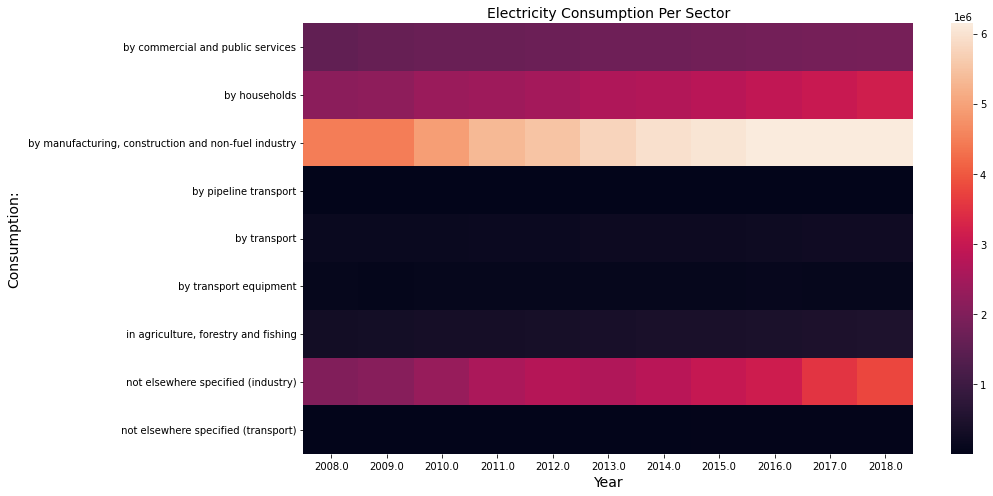

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
Transactions = Q2_agg["Consumption:"].unique().tolist()
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(Q2_agg_wide, robust = True)
plt.xlabel("Year", size=14)
plt.ylabel("Consumption:", size=14)
plt.title("Electricity Consumption Per Sector", size=14)
plt.tight_layout()
plt.show()

## Other Questions:


### i.What are the capacity factors per type of generator? Are the capacity factors comparable per country? Has there be an improvement during the last decade?

Capacity factor (C.F.) is the ratio of the actual electrical energy output over a given period of time to the maximum possible electrical energy output. For example, the C.F. of a 1.5 kilo-Watt rated wind turbine that in a year generates 4000 kilowatt-hours is:

In [ ]:
CF = 4000/(1.5*24*365) #1.5 rated kilowatss * 24 hours * 365 days in a year
print("The calculated capacity factor is:", round(CF,2))

The calculated capacity factor is: 0.3


This questions may be answered by comparing the declared installed capacity per country per year per generator and the corresponding declared generation.

In [ ]:
keyword = ["InstalledCapacity"]
deploy_gen_pths = [s for s in UN_files if any(xs in s for xs in keyword)]
print("\n".join(deploy_gen_pths)) #printing every list item with a newline

/content/drive/MyDrive/Datasets/Sidewalk_Lab/UNdata_Export_InstalledCapacity.csv


In [ ]:
dplyd_gen_df = pd.read_csv(deploy_gen_pths[0])
dplyd_gen_df = dplyd_gen_df.rename({'Country or Area': 'Country', 'Commodity - Transaction': 'Transaction', 'Quantity Footnotes':'Footnotes'}, axis=1)  
trans_lst = dplyd_gen_df.Transaction.unique().tolist()
trans_lst.sort()
print("List of transactions in Dataframe:\n","\n".join(trans_lst))

List of transactions in Dataframe:
 Electricity - net installed capacity of electric power plants public solar
Electricity - net installed capacity of electric power plants, public combustible fuels
Electricity - net installed capacity of electric power plants, public geothermal
Electricity - net installed capacity of electric power plants, public hydro
Electricity - net installed capacity of electric power plants, public nuclear
Electricity - net installed capacity of electric power plants, public tide, wave, marine
Electricity - net installed capacity of electric power plants, public wind
Electricity - net installed capacity of electric power plants, self-producer combustible fuels
Electricity - net installed capacity of electric power plants, self-producer geothermal
Electricity - net installed capacity of electric power plants, self-producer hydro
Electricity - net installed capacity of electric power plants, self-producer nuclear
Electricity - net installed capacity of electric po

### ii.In which country has the generation from renewables (wind, solar, hydro and tidal generators) surpassed generation from thermal generators (Coal, Oil, Natural Gas and Biofuels)?

Can be answered by comparing the sum of renewable generators vs sum of thermal generators for each country per year:
Create two dataframes:
Aggregate(Country, Thermal, Year, Sum(Quantity) & 
Aggregate(Country, Renewable, Year, Sum(Quantity)

Join both dataframes using Country as index. Create a new column in the Join DF with the difference between two aggregates.